In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import os

In [16]:
df = pd.read_csv("../data/cleaned_dataset.csv")
print(df.head())
print(df.shape)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-vhveg    male            0.0     yes         no     1.0           no   
1  5575-gnvde    male            0.0      no         no    34.0          yes   
2  3668-qpybk    male            0.0      no         no     2.0          yes   
3  7795-cfocw    male            0.0      no         no    -5.0           no   
4  9237-hqitu  female            0.0      no         no     2.0          yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  no phone service             dsl             no  ...               no   
1                no             dsl            yes  ...              yes   
2                no             dsl            yes  ...               no   
3  no phone service             dsl            yes  ...              yes   
4                no     fiber optic             no  ...               no   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [17]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns:", categorical_cols)


Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [18]:
for col in categorical_cols:
    print(f"{col} unique values:", df[col].unique())

customerID unique values: ['7590-vhveg' '5575-gnvde' '3668-qpybk' ... '4801-jzazl' '8361-ltmkd'
 '3186-ajiek']
gender unique values: ['male' 'female']
Partner unique values: ['yes' 'no']
Dependents unique values: ['no' 'yes']
PhoneService unique values: ['no' 'yes']
MultipleLines unique values: ['no phone service' 'no' 'yes']
InternetService unique values: ['dsl' 'fiber optic' 'no']
OnlineSecurity unique values: ['no' 'yes' 'no internet service']
OnlineBackup unique values: ['yes' 'no' 'no internet service']
DeviceProtection unique values: ['no' 'yes' 'no internet service']
TechSupport unique values: ['no' 'yes' 'no internet service']
StreamingTV unique values: ['no' 'yes' 'no internet service']
StreamingMovies unique values: ['no' 'yes' 'no internet service']
Contract unique values: ['month-to-month' 'one year' 'two year']
PaperlessBilling unique values: ['yes' 'no']
PaymentMethod unique values: ['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']

In [19]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','Churn']
label_encoder = LabelEncoder()

In [20]:
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])
    print(f"\nEncoded {col} :", df[col].head().values)


Encoded gender : [1 1 1 1 0]

Encoded Partner : [1 0 0 0 0]

Encoded Dependents : [0 0 0 0 0]

Encoded PhoneService : [0 1 1 0 1]

Encoded PaperlessBilling : [1 0 1 0 1]

Encoded Churn : [0 0 1 0 1]


In [21]:
multi_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod']


multi_cols = [col for col in multi_cols if col in df.columns]

df = pd.get_dummies(df, columns=multi_cols, prefix=multi_cols, drop_first=True, dtype=int)

print("\nEncoded DataFrame shape:", df.shape)
print("Encoded columns sample:")
print(df.head())


Encoded DataFrame shape: (7042, 32)
Encoded columns sample:
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-vhveg       1            0.0        1           0     1.0   
1  5575-gnvde       1            0.0        0           0    34.0   
2  3668-qpybk       1            0.0        0           0     2.0   
3  7795-cfocw       1            0.0        0           0    -5.0   
4  9237-hqitu       0            0.0        0           0     2.0   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           70.35       1889.50  ...   
2             1                 1           53.85          0.00  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           70.35        151.65  ...   

   TechSupport_yes  StreamingTV_no internet service  StreamingTV_yes  \
0                0 

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_8300\2111054564.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='gender', data=df, palette=['lightpink', 'lightblue'])


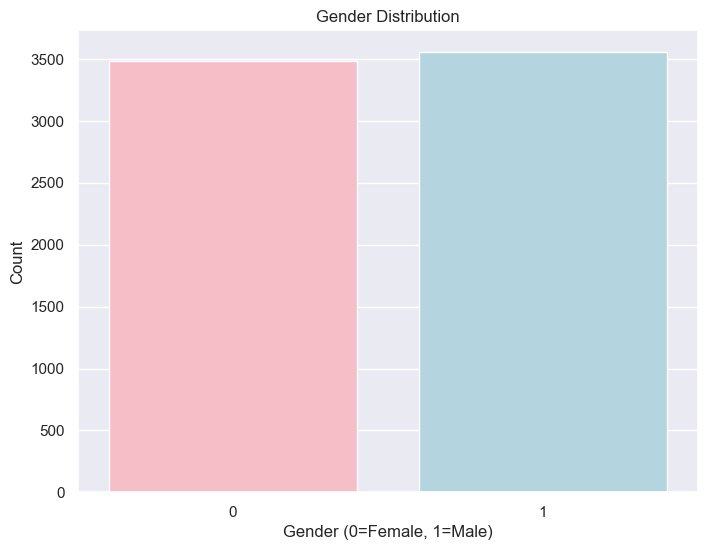

In [22]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='gender', data=df, palette=['lightpink', 'lightblue'])
plt.title('Gender Distribution')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Count')

plt.savefig('../results/eda_visualizations/IT24101376/totalcharges_distribution2.png',
            dpi=300, bbox_inches='tight')
plt.show()


plt.close()


Available columns with 'Internet':
['InternetService_fiber optic', 'InternetService_no']


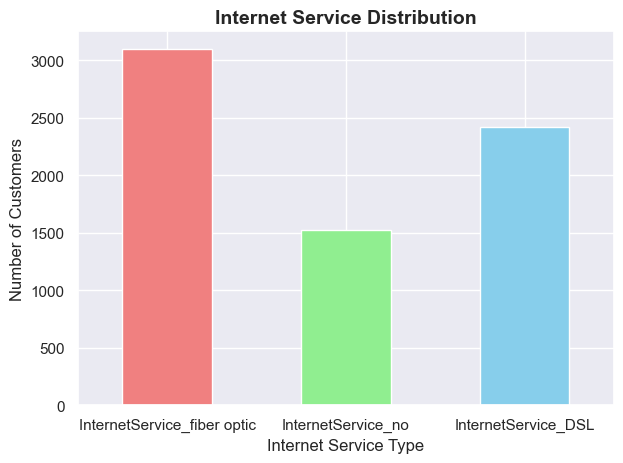

In [23]:

print("Available columns with 'Internet':")
internet_cols_available = [col for col in df.columns if 'Internet' in col]
print(internet_cols_available)

if not internet_cols_available:
    print("No InternetService columns found. Skipping visualization.")
else:
    internet_cols = internet_cols_available
    internet_counts = df[internet_cols].sum()

    if len(internet_cols) == 2:
        dsl_count = len(df) - internet_counts.sum()
        internet_counts = pd.concat([internet_counts,
                                   pd.Series({'InternetService_DSL': dsl_count})])


    internet_counts.plot(kind='bar', color=['lightcoral', 'lightgreen', 'skyblue'])
    plt.title('Internet Service Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Internet Service Type')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=0)
    plt.tight_layout()


    save_path = '../results/eda_visualizations/IT24101376/totalcharges_distribution3.png'
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

In [24]:
df.to_csv("C:/Users/ASUS TUF/PycharmProjects/2025-Y2-S1-MLB-B6G2-07/data/encode_dataset.csv", index=False)
